In [1]:
#devtools::install_github("thebioengineer/tidytuesdayR")
library(tidyverse)
library(tidytuesdayR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(lubridate)
library(janitor)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
tuesdata <- tidytuesdayR::tt_load(2020, week = 15)

--- Downloading #TidyTuesday Information for 2020-04-07 ----

--- Identified 3 files available for download ----

--- Downloading files ---

Warning message:
“230562 parsing failures.
  row        col           expected actual                                                                                file
22069 bib_number 1/0/T/F/TRUE/FALSE     41 '/var/folders/w1/2jzvgfzs1h16xwvjjjh7mn8h0000gn/T//RtmpSKLAV7/file1e89795c315f.csv'
22070 bib_number 1/0/T/F/TRUE/FALSE     11 '/var/folders/w1/2jzvgfzs1h16xwvjjjh7mn8h0000gn/T//RtmpSKLAV7/file1e89795c315f.csv'
22071 bib_number 1/0/T/F/TRUE/FALSE     2  '/var/folders/w1/2jzvgfzs1h16xwvjjjh7mn8h0000gn/T//RtmpSKLAV7/file1e89795c315f.csv'
22072 bib_number 1/0/T/F/TRUE/FALSE     3  '/var/folders/w1/2jzvgfzs1h16xwvjjjh7mn8h0000gn/T//RtmpSKLAV7/file1e89795c315f.csv'
22073 bib_number 1/0/T/F/TRUE/FALSE     5  '/var/folders/w1/2jzvgfzs1h16xwvjjjh7mn8h0000gn/T//RtmpSKLAV7/file1e89795c315f.csv'
..... .......... .................. ...... ...........

In [4]:
tdf_winners <- tuesdata$tdf_winners %>% 
                            mutate(year = year(start_date), 
                                   speed = distance / time_overall)
tdf_stages <- tuesdata$tdf_stages %>%  
                        clean_names()  %>% 
                        mutate(year = year(date))
stage_data <- tuesdata$stage_data %>%  clean_names()

In [5]:
tdf_winners %>% head()

edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,⋯,age,born,died,full_name,nickname,birth_town,birth_country,nationality,year,speed
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1903-07-01,Maurice Garin,La Française,2428,94.55389,2.989167,3,6,1.62,⋯,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,France,1903,25.67848
2,1904-07-02,Henri Cornet,Conte,2428,96.09861,2.270556,1,3,NA,⋯,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,France,1904,25.26571
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994,NA,NA,5,10,NA,⋯,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,France,1905,NA
4,1906-07-04,René Pottier,Peugeot–Wolber,4637,NA,NA,5,12,NA,⋯,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,France,1906,NA
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488,NA,NA,2,5,NA,⋯,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,1907,NA
6,1908-07-13,Lucien Petit-Breton,Peugeot–Wolber,4497,NA,NA,5,13,NA,⋯,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,1908,NA


In [6]:
skimr::skim(tdf_winners)

── Data Summary ────────────────────────
                           Values     
Name                       tdf_winners
Number of rows             106        
Number of columns          21         
_______________________               
Column type frequency:                
  character                7          
  Date                     3          
  numeric                  11         
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 winner_name           0         1        10    19     0       63          0
2 winner_team           0         1         3    33     0       48          0
3 full_name            60         0.434    15    33     0       23          0
4 nickname             32         0.698     1    95     0       37          0
5 birth_town            0         1         3    28     0 

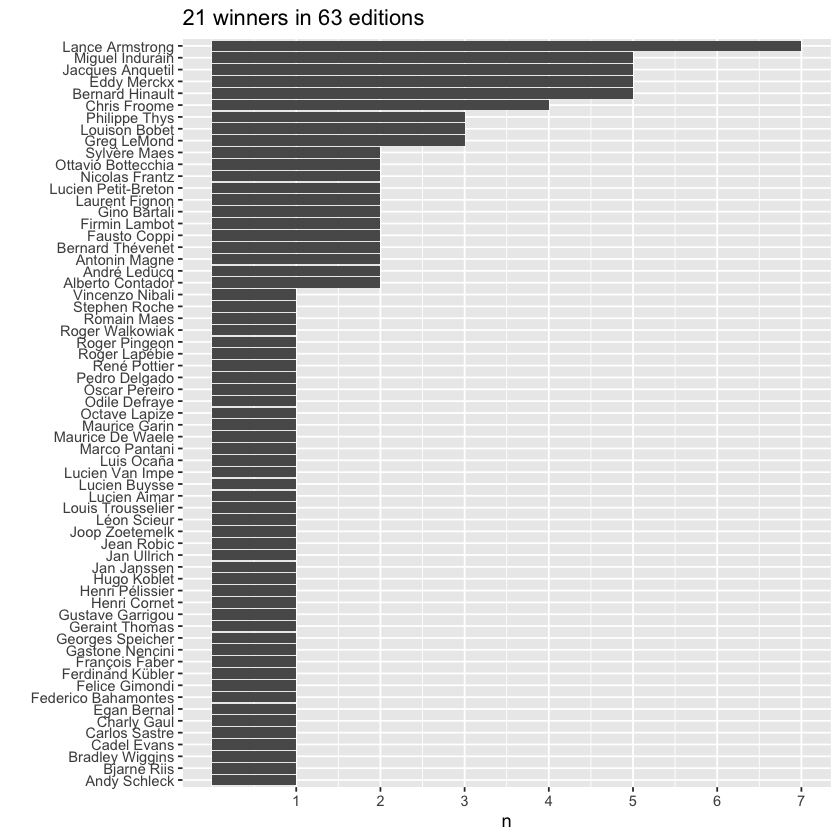

In [7]:
tdf_winners %>% 
            count(winner_name, sort = TRUE) %>%
            mutate(winner_name  = fct_reorder(winner_name, n))  %>% 
            ggplot(aes(n, winner_name)) + 
                geom_col() +
                scale_x_continuous(breaks = 1:7) +
                labs(y = "", title = "21 winners in 63 editions") 

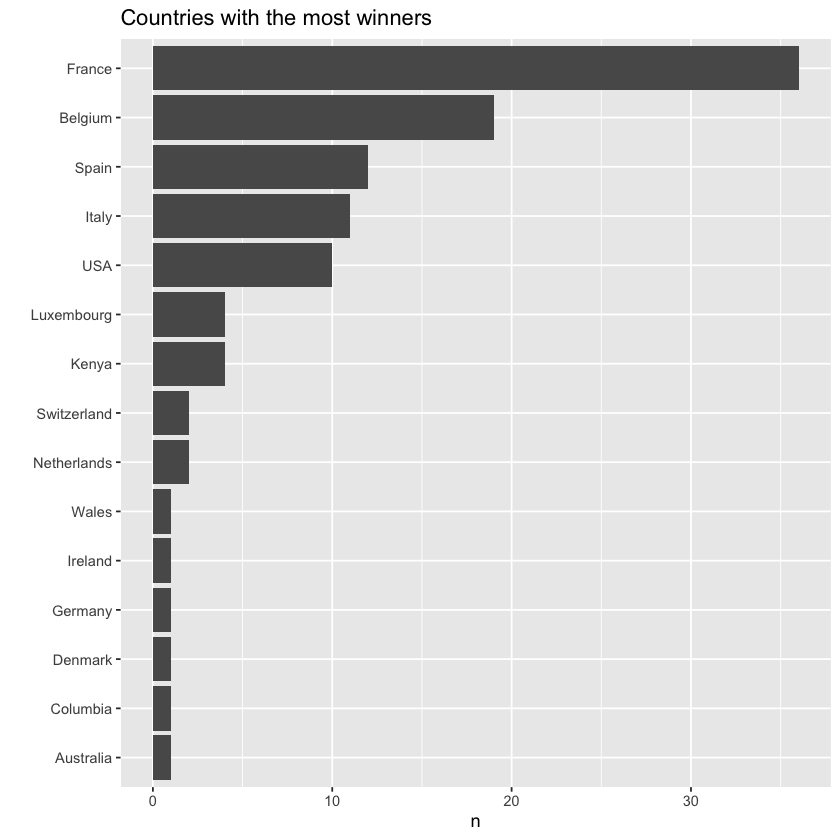

In [8]:
tdf_winners %>% 
            count(birth_country, sort = TRUE) %>%
            mutate(birth_country = fct_reorder(birth_country, n))  %>% 
            ggplot(aes(n, birth_country)) + 
                geom_col() +
                labs(y = "", title = "Countries with the most winners")

In [9]:
tdf_winners  %>% 
        count(winner_name, birth_country, sort = TRUE) %>% 
        head()

winner_name,birth_country,n
<chr>,<chr>,<int>
Lance Armstrong,USA,7
Bernard Hinault,France,5
Eddy Merckx,Belgium,5
Jacques Anquetil,France,5
Miguel Induráin,Spain,5
Chris Froome,Kenya,4


In [10]:
by_decade <- tdf_winners %>%
                    group_by(decade = 10 * (year %/% 10)) %>%
                    filter(decade >= 1910) %>%
                    summarise(winner_age = mean(age, na.rm = TRUE), 
                              winner_height = mean(height, na.rm = TRUE), 
                              winner_weight = mean(weight, na.rm = TRUE), 
                              winner_margin = mean(time_margin, na.rm = TRUE), 
                              winner_speed = mean(speed, na.rm = TRUE))  

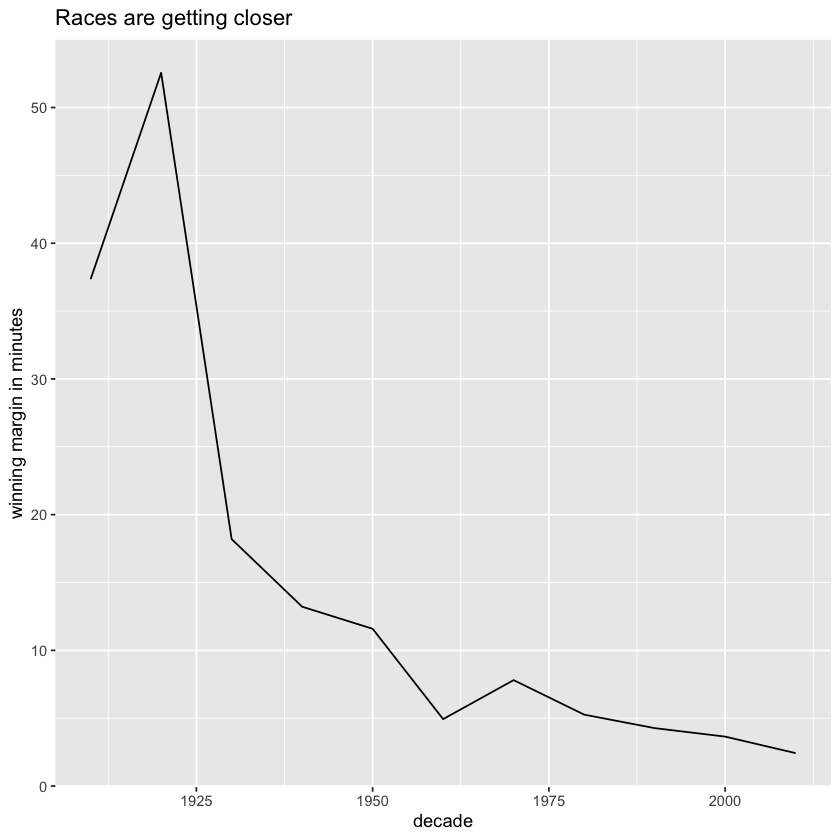

In [11]:
by_decade %>% 
        ggplot(aes(decade, 60 * winner_margin)) +
            geom_line() +
            labs(y = "winning margin in minutes", 
                 x = "decade", title = "Races are getting closer")

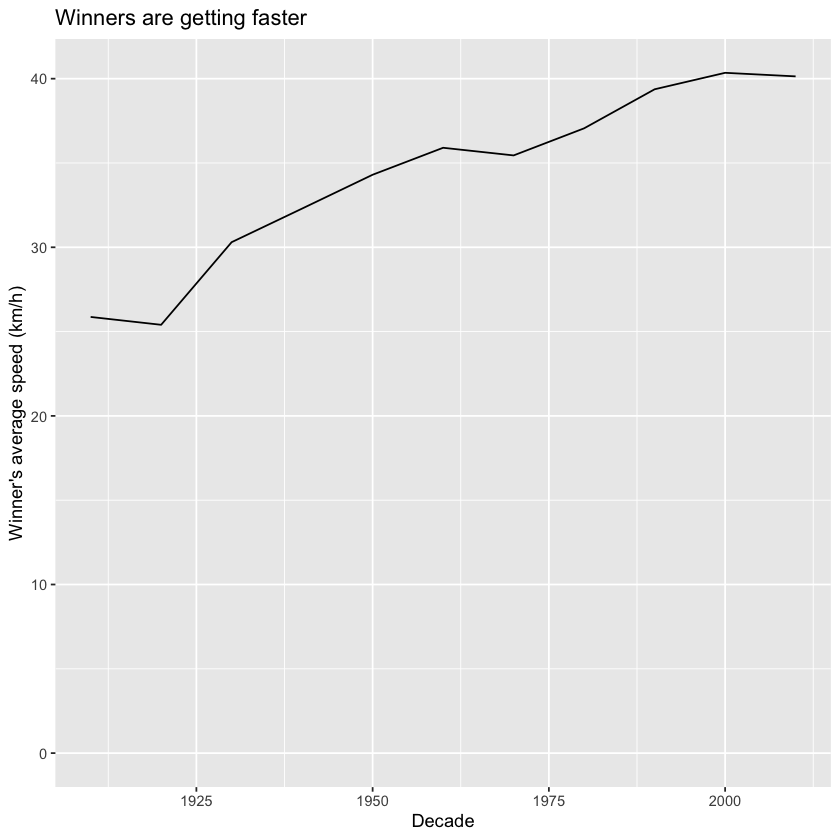

In [12]:
by_decade %>% 
        ggplot(aes(decade, winner_speed)) +
            geom_line() +
                expand_limits(y = 0) + 
                labs(y = "Winner's average speed (km/h)", 
                     x = "Decade", 
                     title = "Winners are getting faster")

In [13]:
names(tdf_winners)

[1] "edition"       "start_date"    "winner_name"   "winner_team"  
 [5] "distance"      "time_overall"  "time_margin"   "stage_wins"   
 [9] "stages_led"    "height"        "weight"        "age"          
[13] "born"          "died"          "full_name"     "nickname"     
[17] "birth_town"    "birth_country" "nationality"   "year"         
[21] "speed"

### Life expentacy

In [14]:
library(survival)

In [15]:
surv_model <- tdf_winners %>% 
                    distinct(winner_name, .keep_all = TRUE) %>%
                    transmute(winner_name, 
                              birth_year = year(born), 
                              death_year = year(died), 
                              dead = as.integer(!is.na(death_year))) %>%
                    mutate(age_at_death = coalesce(death_year, 2020) - birth_year)  %>% 
                    survfit(Surv(age_at_death, dead) ~ 1, data = .)  

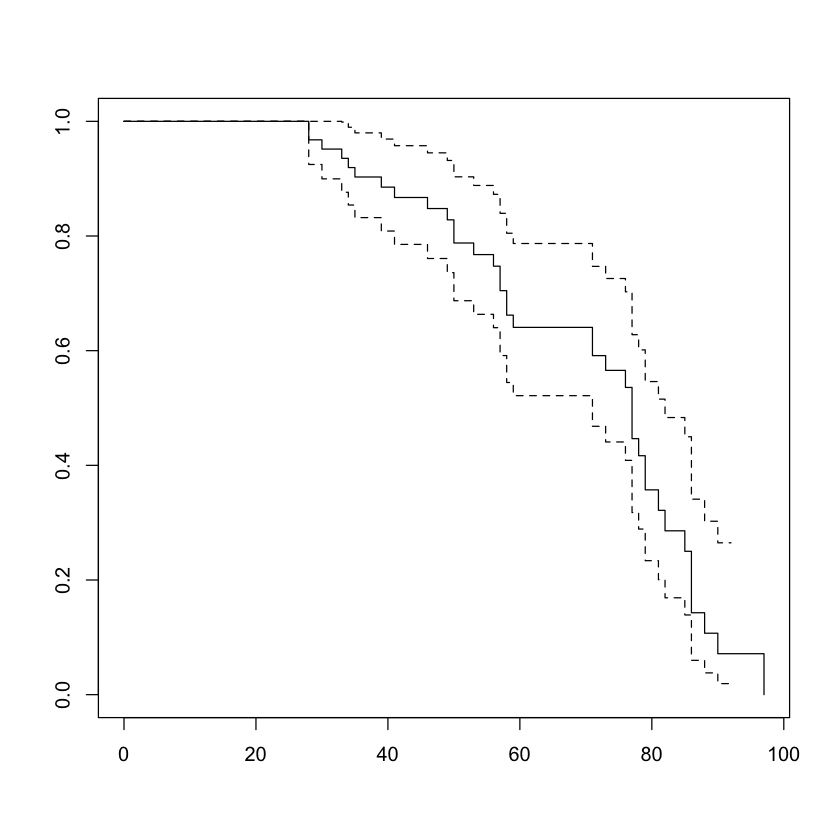

In [16]:
surv_model %>% plot()

In [17]:
library(broom)
glance(surv_model)

#median life expectancy of a tdf winner is 77

records,n.max,n.start,events,rmean,rmean.std.error,median,conf.low,conf.high
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,63,63,38,69.62491,2.685674,77,71,82


In [18]:
tdf_winners %>% 
        distinct(winner_name, .keep_all = TRUE) %>%
        filter(!is.na(died)) %>% 
        dim()

# 38 out of 63 have died...

[1] 38 21

# Stage Data:

In [19]:
stage_data %>% dim()
stage_data %>% head()

[1] 255752     11

edition,year,stage_results_id,rank,time,rider,age,team,points,elapsed,bib_number
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<lgl>
1,1903,stage-1,1,13S,Garin Maurice,32,NA,100,13S,NA
1,1903,stage-1,2,55S,Pagie Émile,32,NA,70,8S,NA
1,1903,stage-1,3,59S,Georget Léon,23,NA,50,12S,NA
1,1903,stage-1,4,48S,Augereau Fernand,20,NA,40,1S,NA
1,1903,stage-1,5,53S,Fischer Jean,36,NA,32,6S,NA
1,1903,stage-1,6,53S,Kerff Marcel,37,NA,26,6S,NA


In [20]:
tdf_stages  %>% dim()
tdf_stages  %>% head()

[1] 2236    9

stage,date,distance,origin,destination,type,winner,winner_country,year
<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,2017
2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,2017
3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,2017
4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017
5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,2017
6,2017-07-06,216.0,Vesoul,Troyes,Flat stage,Marcel Kittel,GER,2017


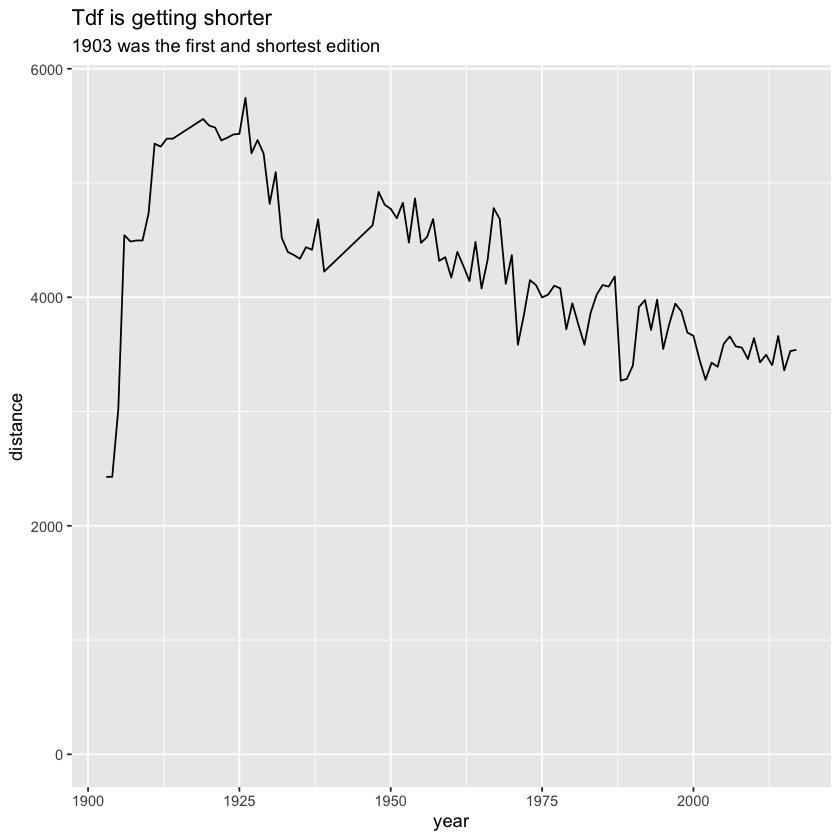

In [21]:
tdf_stages %>%  
            group_by(year)  %>% 
            summarise(distance = sum(distance)) %>% 
            ggplot(aes(year, distance)) + 
                    geom_line() +
                    expand_limits(y = 0) +
                    labs(x = "year",
                         y = "distance", 
                         title = "Tdf is getting shorter", 
                         subtitle = "1903 was the first and shortest edition")

In [22]:
stage_data_ranks <- 
        stage_data  %>% 
        group_by(year, rider)  %>%
        summarise(total_points = sum(points, na.rm = TRUE))  %>% 
        mutate(points_rank = percent_rank(total_points))  %>% 
        ungroup()

In [23]:
head(stage_data_ranks)

year,rider,total_points,points_rank
<dbl>,<chr>,<dbl>,<dbl>
1903,Aucouturier Hippolyte,200,0.9772727
1903,Augereau Fernand,180,0.9545455
1903,Barroy Lucien,0,0.0000000
1903,Barthelmann Ludwig,0,0.0000000
1903,Beaugendre François,60,0.7045455
1903,Borot Georges,0,0.0000000


In [25]:
stage_data_percentile <- 
        stage_data %>% 
        separate(stage_results_id, into = c("name", "stage"))  %>%        
        inner_join(stage_data_ranks, by = c("year", "rider"))  %>%
        group_by(year, stage)  %>% 
        mutate(rank = as.integer(rank), 
               finishers = sum(!is.na(rank)))  %>% 
        ungroup()  %>% 
        mutate(percentile_rank = 1 - rank / finishers)
          

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced b

In [26]:
stage_data_percentile  %>%  
        select(year, rider, percentile_rank)  %>% 
        head()

year,rider,percentile_rank
<dbl>,<chr>,<dbl>
1903,Garin Maurice,0.9729730
1903,Pagie Émile,0.9459459
1903,Georget Léon,0.9189189
1903,Augereau Fernand,0.8918919
1903,Fischer Jean,0.8648649
1903,Kerff Marcel,0.8378378


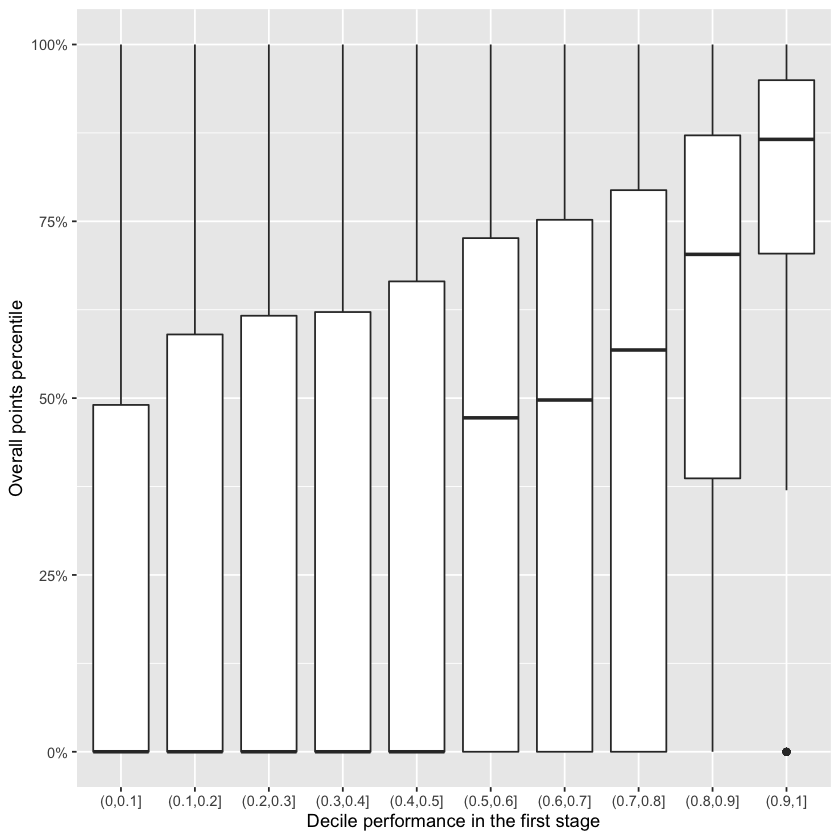

In [27]:
stage_data_percentile  %>% 
        filter(stage == 1)  %>% 
        select(year, rider, 
               percentile_first_stage = percentile_rank, 
               total_points, 
               points_rank)   %>%
        mutate(first_stage_bin = cut(percentile_first_stage, seq(0, 1, 0.1)))  %>% 
        filter(!is.na(first_stage_bin))  %>% 
        ggplot(aes(first_stage_bin, points_rank)) +
            geom_boxplot() +
            scale_y_continuous(labels = scales::percent) +
            labs(x = "Decile performance in the first stage", 
                 y = "Overall points percentile")

### 2017 tdf animation

In [30]:
library(gganimate)

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



In [31]:
top_10_2017 <- 
        stage_data_ranks  %>%  
        filter(year == 2017)  %>% 
        top_n(10, total_points)

top_10_2017

year,rider,total_points,points_rank
<dbl>,<chr>,<dbl>,<dbl>
2017,Bardet Romain,284,0.9644670
2017,Barguil Warren,340,0.9746193
2017,Boasson Hagen Edvald,422,0.9898477
2017,Démare Arnaud,274,0.9593909
2017,Froome Chris,346,0.9847716
2017,Greipel André,262,0.9543147
2017,Groenewegen Dylan,304,0.9695431
2017,Kittel Marcel,518,1.0000000
2017,Matthews Michael,430,0.9949239


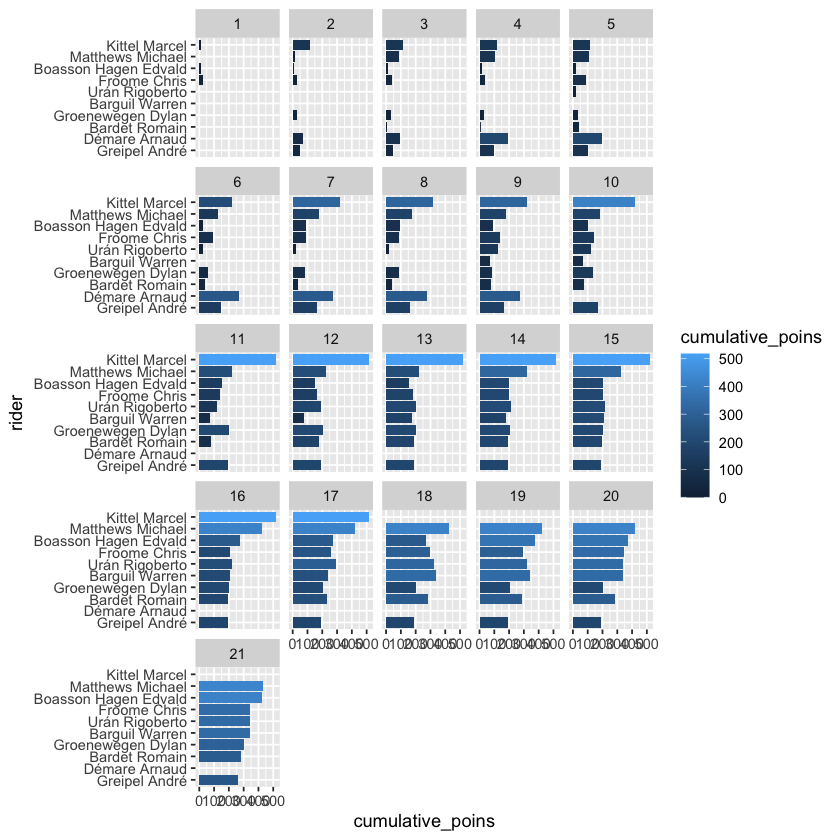

In [32]:
stage_data_percentile  %>%
        filter(year == 2017)  %>% 
        semi_join(top_10_2017, by = "rider")  %>% 
        mutate(stage = as.integer(stage), 
               points = coalesce(points, 0))  %>% 
        group_by(rider)  %>% 
        mutate(cumulative_poins = cumsum(points)) %>%
        ungroup() %>%
        mutate(rider = fct_reorder(rider, total_points)) %>% 
        ggplot(aes(cumulative_poins, rider, fill = cumulative_poins)) +
            geom_col() +
            #to animate: transition_time(stage)
            facet_wrap(~stage)
